In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product, combinations
from matplotlib_venn import venn3

# Load the CSV file
file_path = '/Users/akashdas/Desktop/IU MS DS FALL 2023/SEMESTER 4 - SPRING 2025/FADS 2025/Data/Manual-Review2.csv'
df = pd.read_csv(file_path)

<Figure size 800x500 with 0 Axes>

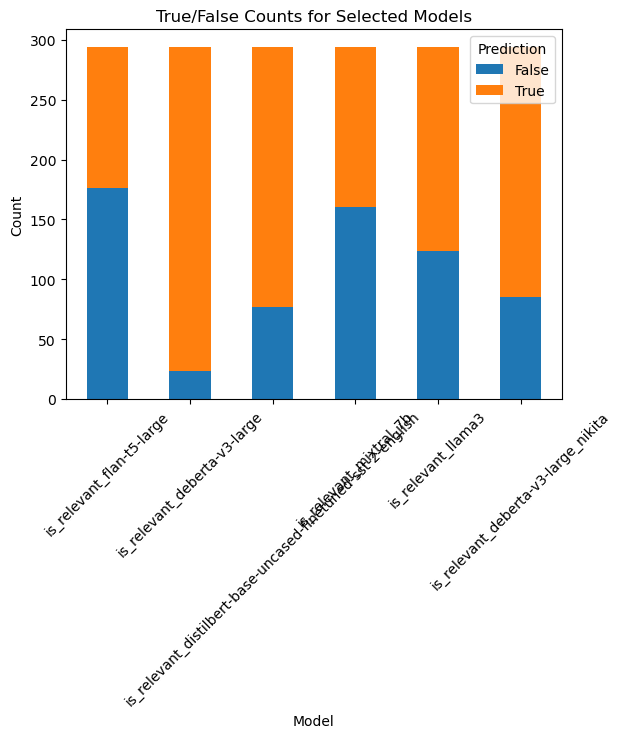

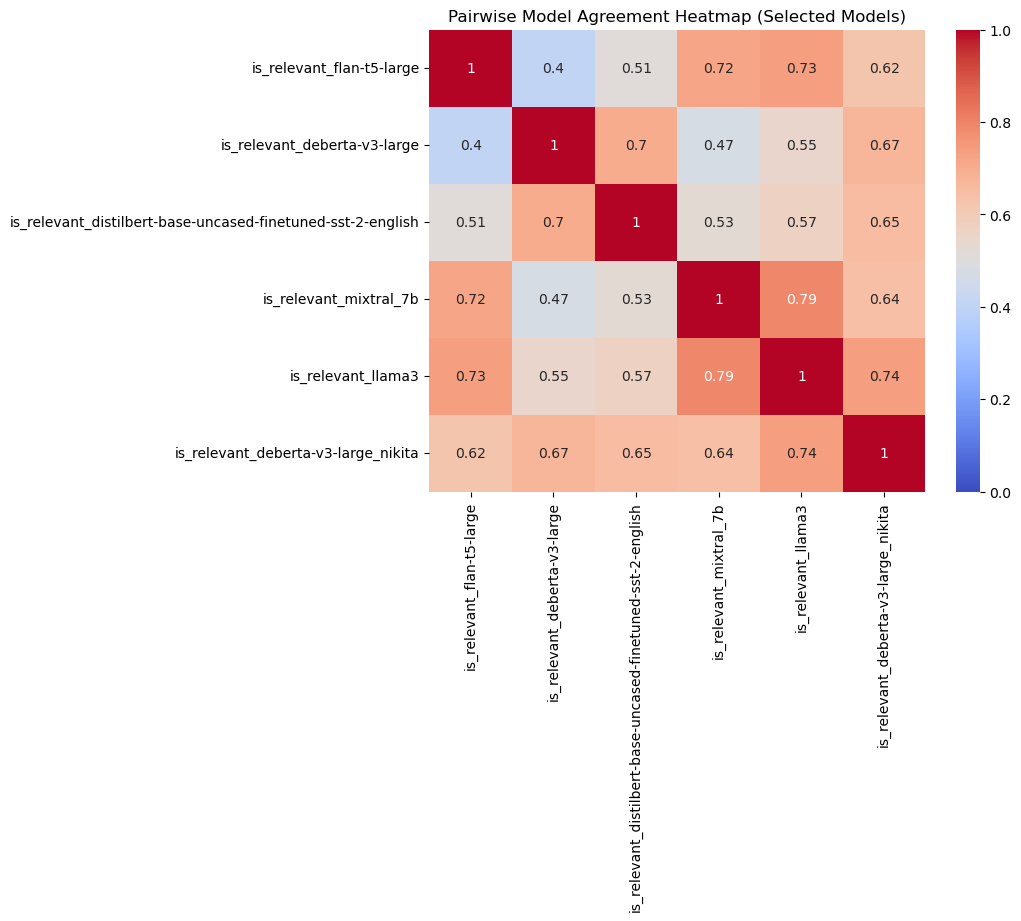

/Users/akashdas/anaconda3/envs/RA/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/akashdas/anaconda3/envs/RA/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

<Figure size 1400x700 with 0 Axes>

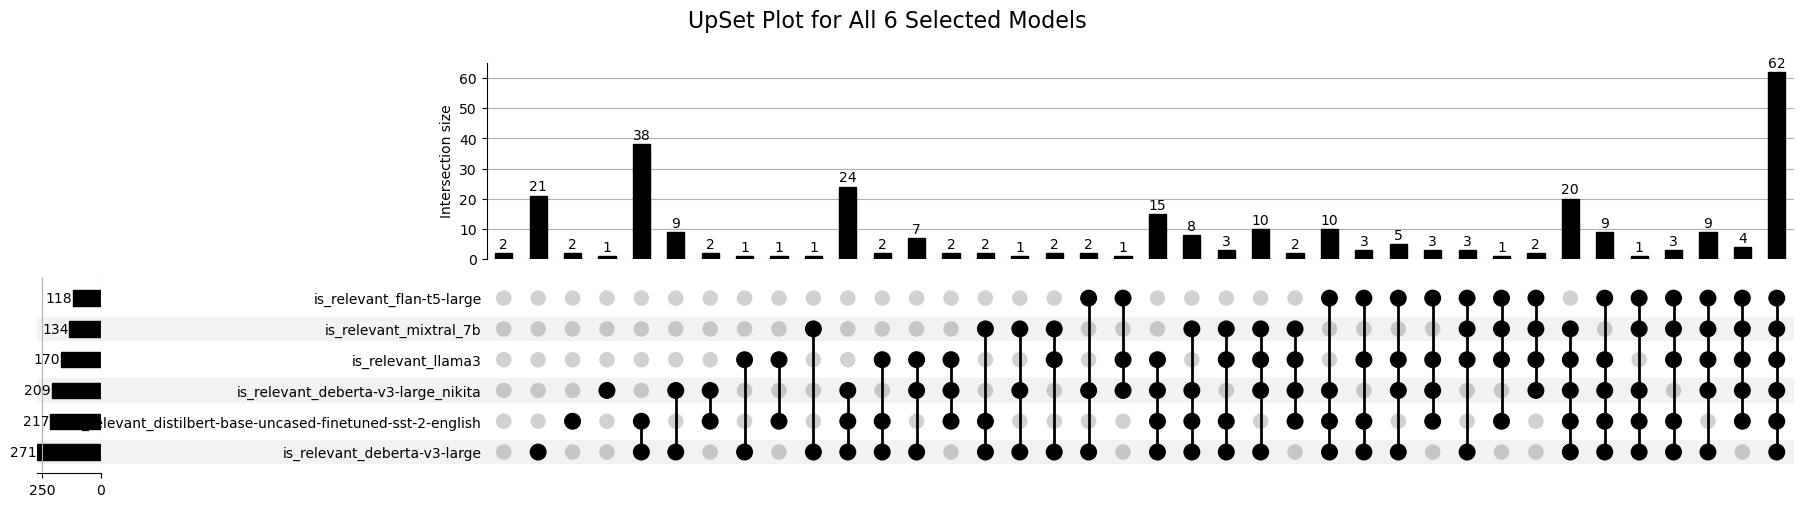


✅ Articles where all 6 models are True: 62


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from upsetplot import UpSet, from_indicators

# Filter relevant model columns
selected_models = [
    'is_relevant_flan-t5-large', 
    'is_relevant_deberta-v3-large', 
    'is_relevant_distilbert-base-uncased-finetuned-sst-2-english',
    'is_relevant_mixtral_7b',
    'is_relevant_llama3',
    'is_relevant_deberta-v3-large_nikita'
]

# Ensure predictions are in boolean format
df[selected_models] = df[selected_models].astype(bool)

# 1️⃣ Count of True/False Predictions for Each Model
true_false_counts = df[selected_models].apply(lambda x: x.value_counts()).fillna(0)

# Plot True/False distribution
plt.figure(figsize=(8, 5))
true_false_counts.T.plot(kind='bar', stacked=True)
plt.title("True/False Counts for Selected Models")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Prediction")
plt.show()

# 2️⃣ Articles classified as True or False by all selected models
all_true = df[df[selected_models].all(axis=1)]
all_false = df[~df[selected_models].any(axis=1)]

# 3️⃣ All permutation combinations of model predictions
combination_counts = {}
for combination in product([True, False], repeat=len(selected_models)):
    mask = (df[selected_models] == combination).all(axis=1)
    count = mask.sum()
    combination_counts[combination] = count

# Convert permutation stats into a DataFrame
combination_stats = pd.DataFrame(
    [{"Combination": combination, "Count": count} for combination, count in combination_counts.items()]
)

# 4️⃣ Pairwise Agreement Heatmap
agreement_matrix = pd.DataFrame(index=selected_models, columns=selected_models, dtype=float)

for model1 in selected_models:
    for model2 in selected_models:
        agreement = (df[model1] == df[model2]).sum() / len(df)
        agreement_matrix.loc[model1, model2] = agreement

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(agreement_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Pairwise Model Agreement Heatmap (Selected Models)")
plt.show()

# 5️⃣ UpSet Plot for ALL 6 models
upset_data = from_indicators(selected_models, df)

plt.figure(figsize=(14, 7))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle("UpSet Plot for All 6 Selected Models", fontsize=16)
plt.show()

# 6️⃣ Export filtered results
all_true.to_csv("selected_models_all_true_articles.csv", index=False)
all_false.to_csv("selected_models_all_false_articles.csv", index=False)
combination_stats.to_csv("selected_models_combination_statistics.csv", index=False)

# 🔔 Verify all True count
all_true_count = df[selected_models].all(axis=1).sum()
print(f"\n✅ Articles where all 6 models are True: {all_true_count}")

In [4]:
# Filter relevant model columns
selected_models = [
    'is_relevant_flan-t5-large', 
    'is_relevant_deberta-v3-large', 
    'is_relevant_distilbert-base-uncased-finetuned-sst-2-english',
    'is_relevant_mixtral_7b',
    'is_relevant_llama3',
    'is_relevant_deberta-v3-large_nikita'
]

# Ensure predictions are in boolean format
df[selected_models] = df[selected_models].astype(bool)

# 1️⃣ Total Articles
total_articles = len(df)
print(f"\n📊 Total Articles: {total_articles}")

# 2️⃣ True/False counts for each model
print("\n✅ True/False Counts per Model:")
for model in selected_models:
    true_count = df[model].sum()
    false_count = total_articles - true_count
    print(f"{model}: True = {true_count}, False = {false_count}")

# 3️⃣ Agreement: Articles where ALL models predict True
all_true = df[df[selected_models].all(axis=1)]

# 4️⃣ Agreement: Articles where ALL models predict False
all_false = df[~df[selected_models].any(axis=1)]

# 5️⃣ Disagreement: Articles with mixed predictions
# For pairwise disagreements (optional), you can check each pair, but here we'll just print total "mixed" articles
mixed_predictions = total_articles - (len(all_true) + len(all_false))

# 6️⃣ Summary
print(f"\n🤝 Full Agreement across ALL models:")
print(f"Articles classified as True in all models: {len(all_true)}")
print(f"Articles classified as False in all models: {len(all_false)}")

print(f"\n⚡ Mixed Predictions (some True, some False): {mixed_predictions}")


📊 Total Articles: 294

✅ True/False Counts per Model:
is_relevant_flan-t5-large: True = 118, False = 176
is_relevant_deberta-v3-large: True = 271, False = 23
is_relevant_distilbert-base-uncased-finetuned-sst-2-english: True = 217, False = 77
is_relevant_mixtral_7b: True = 134, False = 160
is_relevant_llama3: True = 170, False = 124
is_relevant_deberta-v3-large_nikita: True = 209, False = 85

🤝 Full Agreement across ALL models:
Articles classified as True in all models: 62
Articles classified as False in all models: 2

⚡ Mixed Predictions (some True, some False): 230


In [6]:
import pandas as pd
from itertools import combinations

# Filter relevant model columns
selected_models = [
    'is_relevant_flan-t5-large', 
    'is_relevant_deberta-v3-large', 
    'is_relevant_distilbert-base-uncased-finetuned-sst-2-english',
    'is_relevant_mixtral_7b',
    'is_relevant_llama3',
    'is_relevant_deberta-v3-large_nikita'
]

# Ensure predictions are in boolean format
df[selected_models] = df[selected_models].astype(bool)

# 1️⃣ Total Articles
total_articles = len(df)
print(f"\n📊 Total Articles: {total_articles}")

# 2️⃣ True/False counts for each model
print("\n✅ True/False Counts per Model:")
for model in selected_models:
    true_count = df[model].sum()
    false_count = total_articles - true_count
    print(f"{model}: True = {true_count}, False = {false_count}")

# 3️⃣ Full agreement: All models predict True
all_true = df[df[selected_models].all(axis=1)]

# 4️⃣ Full disagreement: All models predict False
all_false = df[~df[selected_models].any(axis=1)]

# 5️⃣ Mixed predictions: At least one True and one False
mixed_predictions = total_articles - (len(all_true) + len(all_false))

print(f"\n🤝 Full Agreement across ALL models:")
print(f"Articles classified as True in all models: {len(all_true)}")
print(f"Articles classified as False in all models: {len(all_false)}")
print(f"⚡ Mixed Predictions (some True, some False): {mixed_predictions}")

# 6️⃣ Pairwise Disagreements
print("\n⚡ Pairwise Disagreements:")
for model1, model2 in combinations(selected_models, 2):
    disagreement_count = ((df[model1] != df[model2])).sum()
    print(f"{model1} vs {model2}: {disagreement_count} disagreements")


📊 Total Articles: 294

✅ True/False Counts per Model:
is_relevant_flan-t5-large: True = 118, False = 176
is_relevant_deberta-v3-large: True = 271, False = 23
is_relevant_distilbert-base-uncased-finetuned-sst-2-english: True = 217, False = 77
is_relevant_mixtral_7b: True = 134, False = 160
is_relevant_llama3: True = 170, False = 124
is_relevant_deberta-v3-large_nikita: True = 209, False = 85

🤝 Full Agreement across ALL models:
Articles classified as True in all models: 62
Articles classified as False in all models: 2
⚡ Mixed Predictions (some True, some False): 230

⚡ Pairwise Disagreements:
is_relevant_flan-t5-large vs is_relevant_deberta-v3-large: 175 disagreements
is_relevant_flan-t5-large vs is_relevant_distilbert-base-uncased-finetuned-sst-2-english: 143 disagreements
is_relevant_flan-t5-large vs is_relevant_mixtral_7b: 82 disagreements
is_relevant_flan-t5-large vs is_relevant_llama3: 78 disagreements
is_relevant_flan-t5-large vs is_relevant_deberta-v3-large_nikita: 111 disagreem

In [7]:
import pandas as pd
from itertools import combinations

# Filter relevant model columns
selected_models = [
    'is_relevant_flan-t5-large', 
    'is_relevant_deberta-v3-large', 
    'is_relevant_distilbert-base-uncased-finetuned-sst-2-english',
    'is_relevant_mixtral_7b',
    'is_relevant_llama3',
    'is_relevant_deberta-v3-large_nikita'
]

# Ensure boolean format
df[selected_models] = df[selected_models].astype(bool)

# 1️⃣ True/False balance for each model
print("\n✅ True/False Counts per Model:")
true_false_counts = {}
for model in selected_models:
    true_count = df[model].sum()
    false_count = len(df) - true_count
    true_false_counts[model] = {'True': true_count, 'False': false_count}
    print(f"{model}: True = {true_count}, False = {false_count}")

# 2️⃣ Pairwise disagreements
print("\n⚡ Pairwise Disagreements:")
disagreement_counts = pd.DataFrame(0, index=selected_models, columns=selected_models)

for model1, model2 in combinations(selected_models, 2):
    disagreements = (df[model1] != df[model2]).sum()
    disagreement_counts.loc[model1, model2] = disagreements
    disagreement_counts.loc[model2, model1] = disagreements
    print(f"{model1} vs {model2}: {disagreements} disagreements")

# 3️⃣ Find the least disagreeing model (sum of disagreements)
total_disagreements = disagreement_counts.sum(axis=1)
best_model = total_disagreements.idxmin()
print(f"\n🏆 Least disagreeing model: {best_model} with {total_disagreements[best_model]} total disagreements with others.")


✅ True/False Counts per Model:
is_relevant_flan-t5-large: True = 118, False = 176
is_relevant_deberta-v3-large: True = 271, False = 23
is_relevant_distilbert-base-uncased-finetuned-sst-2-english: True = 217, False = 77
is_relevant_mixtral_7b: True = 134, False = 160
is_relevant_llama3: True = 170, False = 124
is_relevant_deberta-v3-large_nikita: True = 209, False = 85

⚡ Pairwise Disagreements:
is_relevant_flan-t5-large vs is_relevant_deberta-v3-large: 175 disagreements
is_relevant_flan-t5-large vs is_relevant_distilbert-base-uncased-finetuned-sst-2-english: 143 disagreements
is_relevant_flan-t5-large vs is_relevant_mixtral_7b: 82 disagreements
is_relevant_flan-t5-large vs is_relevant_llama3: 78 disagreements
is_relevant_flan-t5-large vs is_relevant_deberta-v3-large_nikita: 111 disagreements
is_relevant_deberta-v3-large vs is_relevant_distilbert-base-uncased-finetuned-sst-2-english: 88 disagreements
is_relevant_deberta-v3-large vs is_relevant_mixtral_7b: 155 disagreements
is_relevant_

/Users/akashdas/anaconda3/envs/RA/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


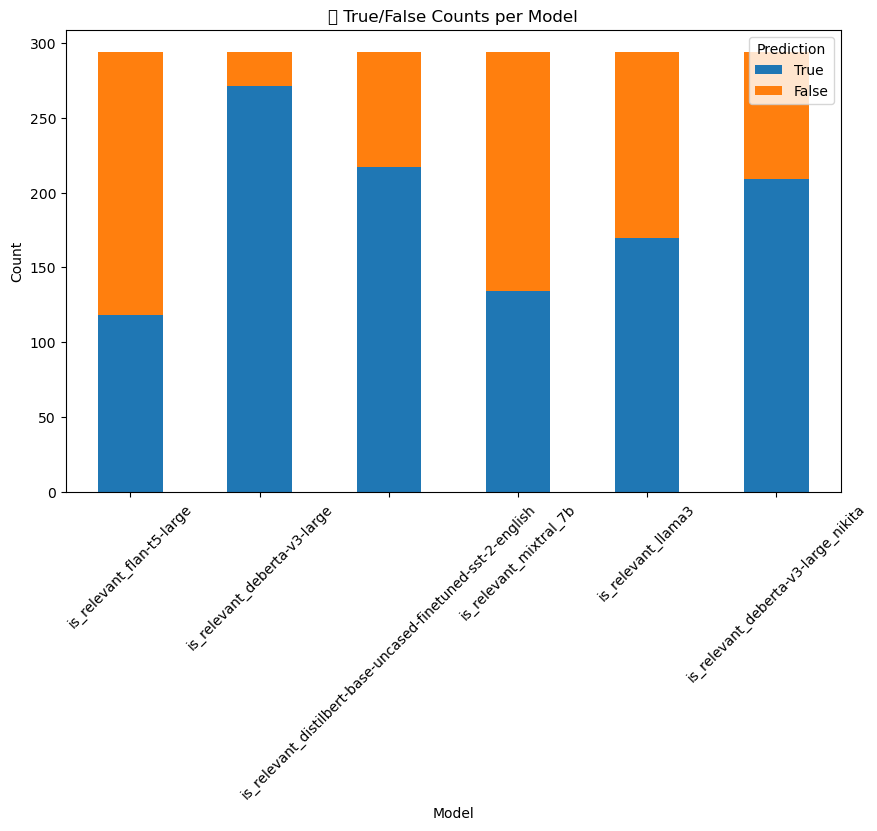

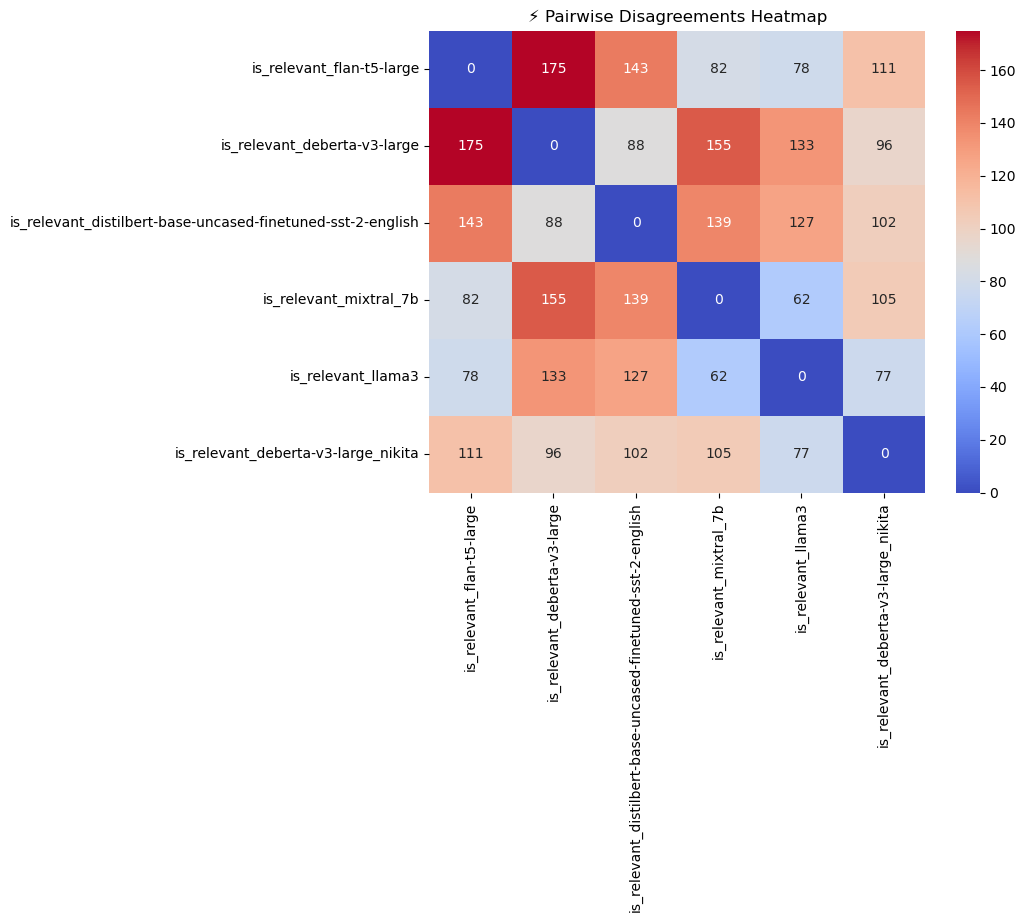


🏆 Least disagreeing model: is_relevant_llama3 with 477 total disagreements with others.

🤖 Ensemble Majority Vote Results:
True: 216
False: 78


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Filter relevant model columns
selected_models = [
    'is_relevant_flan-t5-large', 
    'is_relevant_deberta-v3-large', 
    'is_relevant_distilbert-base-uncased-finetuned-sst-2-english',
    'is_relevant_mixtral_7b',
    'is_relevant_llama3',
    'is_relevant_deberta-v3-large_nikita'
]

# Ensure boolean format
df[selected_models] = df[selected_models].astype(bool)

# 1️⃣ True/False balance per model
true_false_counts = {}
for model in selected_models:
    true_count = df[model].sum()
    false_count = len(df) - true_count
    true_false_counts[model] = {'True': true_count, 'False': false_count}

# Plot True/False counts
counts_df = pd.DataFrame(true_false_counts).T
counts_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("✅ True/False Counts per Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Prediction")
plt.show()

# 2️⃣ Pairwise disagreements
disagreement_counts = pd.DataFrame(0, index=selected_models, columns=selected_models)
for model1, model2 in combinations(selected_models, 2):
    disagreements = (df[model1] != df[model2]).sum()
    disagreement_counts.loc[model1, model2] = disagreements
    disagreement_counts.loc[model2, model1] = disagreements

# Plot heatmap of disagreements
plt.figure(figsize=(8, 6))
sns.heatmap(disagreement_counts, annot=True, cmap="coolwarm", fmt="d")
plt.title("⚡ Pairwise Disagreements Heatmap")
plt.show()

# 3️⃣ Find least disagreeing model
total_disagreements = disagreement_counts.sum(axis=1)
best_model = total_disagreements.idxmin()
print(f"\n🏆 Least disagreeing model: {best_model} with {total_disagreements[best_model]} total disagreements with others.")

# 4️⃣ Ensemble Majority Vote
# Sum True values across models (True = 1, False = 0)
df['ensemble_majority_vote'] = df[selected_models].sum(axis=1) >= (len(selected_models) / 2)

# Ensemble stats
ensemble_true = df['ensemble_majority_vote'].sum()
ensemble_false = len(df) - ensemble_true
print(f"\n🤖 Ensemble Majority Vote Results:")
print(f"True: {ensemble_true}")
print(f"False: {ensemble_false}")

In [11]:
# Initialize balance stats
balance_stats = {}

print("\n📊 Model Balance Statistics:")
for model in selected_models:
    true_count = df[model].sum()
    false_count = len(df) - true_count
    total = len(df)
    
    true_percentage = (true_count / total) * 100
    false_percentage = (false_count / total) * 100
    
    # Difference from perfect 50% balance
    balance_difference = abs(true_percentage - 50)
    
    balance_stats[model] = {
        'True': true_count,
        'False': false_count,
        'True %': true_percentage,
        'False %': false_percentage,
        'Balance Difference %': balance_difference
    }
    
    print(f"{model}: True = {true_count} ({true_percentage:.2f}%), "
          f"False = {false_count} ({false_percentage:.2f}%), "
          f"Balance Difference = {balance_difference:.2f}%")

# Get the most balanced model (closest to 50/50)
most_balanced_model = min(balance_stats, key=lambda x: balance_stats[x]['Balance Difference %'])
print(f"\n⚖️ Most Balanced Model: {most_balanced_model} "
      f"with a balance difference of {balance_stats[most_balanced_model]['Balance Difference %']:.2f}%")

# Optional: Standard deviation across models (to check model variability)
import numpy as np

true_counts = [balance_stats[model]['True'] for model in selected_models]
false_counts = [balance_stats[model]['False'] for model in selected_models]

true_std = np.std(true_counts)
false_std = np.std(false_counts)

print(f"\n📈 Standard Deviation across Models:")
print(f"True Counts Std Dev: {true_std:.2f}")
print(f"False Counts Std Dev: {false_std:.2f}")


📊 Model Balance Statistics:
is_relevant_flan-t5-large: True = 118 (40.14%), False = 176 (59.86%), Balance Difference = 9.86%
is_relevant_deberta-v3-large: True = 271 (92.18%), False = 23 (7.82%), Balance Difference = 42.18%
is_relevant_distilbert-base-uncased-finetuned-sst-2-english: True = 217 (73.81%), False = 77 (26.19%), Balance Difference = 23.81%
is_relevant_mixtral_7b: True = 134 (45.58%), False = 160 (54.42%), Balance Difference = 4.42%
is_relevant_llama3: True = 170 (57.82%), False = 124 (42.18%), Balance Difference = 7.82%
is_relevant_deberta-v3-large_nikita: True = 209 (71.09%), False = 85 (28.91%), Balance Difference = 21.09%

⚖️ Most Balanced Model: is_relevant_mixtral_7b with a balance difference of 4.42%

📈 Standard Deviation across Models:
True Counts Std Dev: 52.12
False Counts Std Dev: 52.12
